In [1]:
# preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#scikit-model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# danh gia model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve , RocCurveDisplay
#turning
from sklearn.model_selection import GridSearchCV
df = pd.read_csv("D:\khóa học\Complete Machine Learning _ Data Science Bootcamp 2023\heart.csv")

1. age:
2. sex: (1. male, 0. female)
3. cp: (chest pain type) 4 types: 
    * 0: typical angina: chest pain related decrease blood supply
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [4]:
df[['age', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']] = df[['age', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   category
 1   sex       1025 non-null   int64   
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   category
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   category
 12  thal      1025 non-null   category
 13  target    1025 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 51.8 KB


In [5]:
#check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

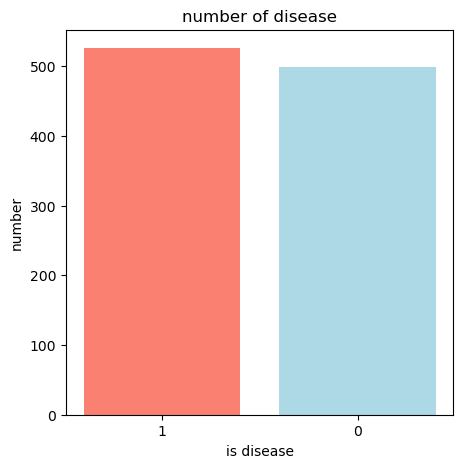

In [7]:
fix,ax = plt.subplots(figsize = [5,5])
bar1 = ax.bar(x = ['1','0'],height = df['target'].value_counts(),color = ["salmon",'lightblue'])
ax.set(title = 'number of disease',xlabel='is disease', ylabel='number');

In [8]:
df.describe()

,sex,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,0.695610,131.611707,246.00000,149.114146,1.071512
std,0.460373,17.516718,51.59251,23.005724,1.175053
min,0.000000,94.000000,126.00000,71.000000,0.000000
25%,0.000000,120.000000,211.00000,132.000000,0.000000
50%,1.000000,130.000000,240.00000,152.000000,0.800000
75%,1.000000,140.000000,275.00000,166.000000,1.800000
max,1.000000,200.000000,564.00000,202.000000,6.200000


## Target ảnh hưởng bởi sex 
sex: (1. male, 0. female)

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


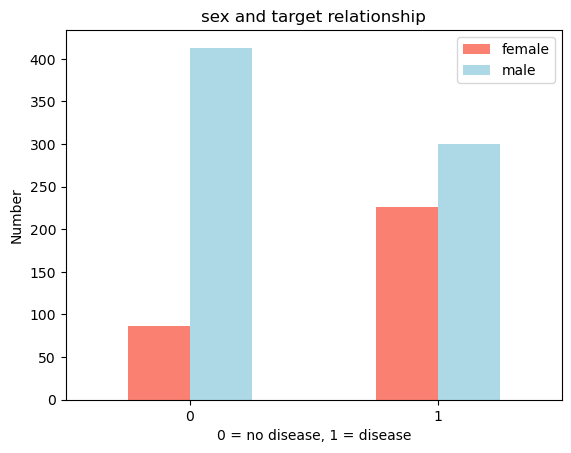

In [10]:
pd.crosstab(df.target,df.sex).plot(kind = 'bar', color = ['salmon','lightblue']);
plt.xlabel('0 = no disease, 1 = disease')
plt.ylabel('Number')
plt.legend(['female','male'])
plt.title("sex and target relationship")
plt.xticks(rotation = 0);

## About age, trestbps related to disease (cuz age and trestbps have relationship)

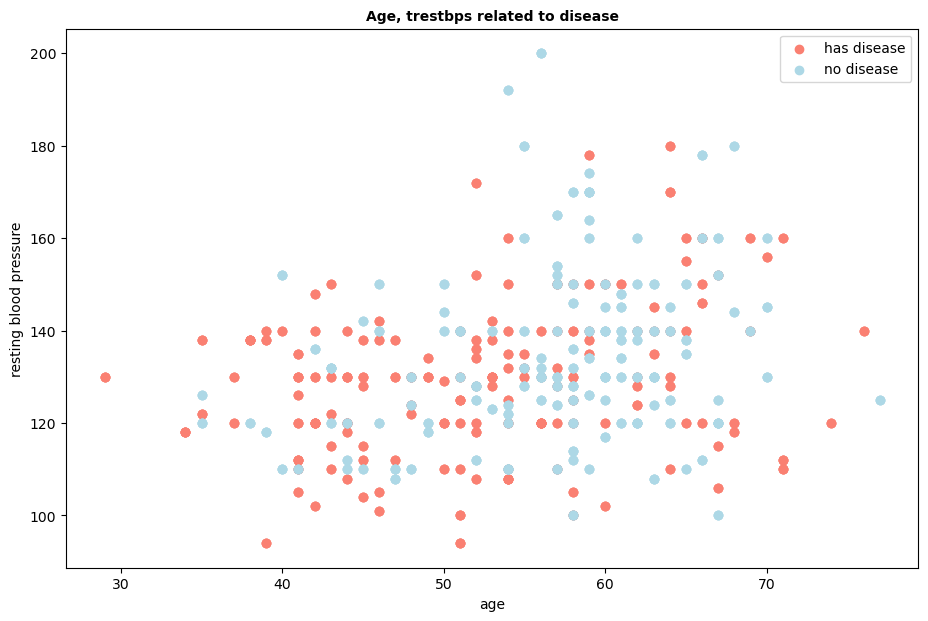

In [11]:
plt.subplots(figsize = [11,7])
plt.scatter( df.age[df.target==1],df.trestbps[df.target==1],color = 'salmon')
plt.scatter( df.age[df.target==0],df.trestbps[df.target==0],color = 'lightblue')
plt.xlabel('age')
plt.ylabel('resting blood pressure')
plt.legend(['has disease','no disease'])
plt.title('Age, trestbps related to disease',fontsize = 10,fontweight = 'bold');

## Chest pain related to disease
3. cp: (chest pain type) 4 types: 
    * 0: typical angina: chest pain related decrease blood supply
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [12]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


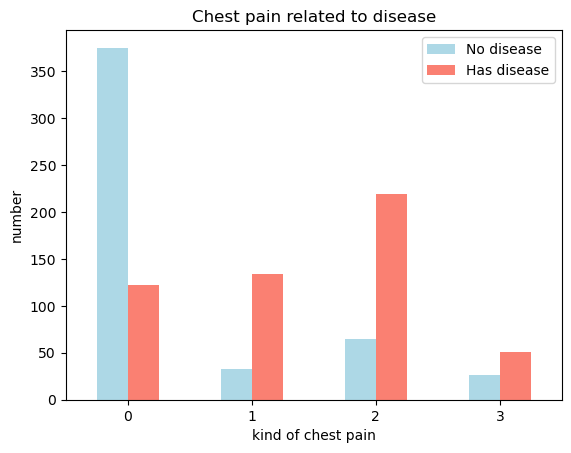

In [13]:
pd.crosstab(df.cp,df.target).plot(kind = 'bar',color = ['lightblue','salmon'])
plt.xlabel('kind of chest pain')
plt.ylabel('number')
plt.title('Chest pain related to disease')
plt.legend(['No disease','Has disease'])
plt.xticks(rotation = 0);

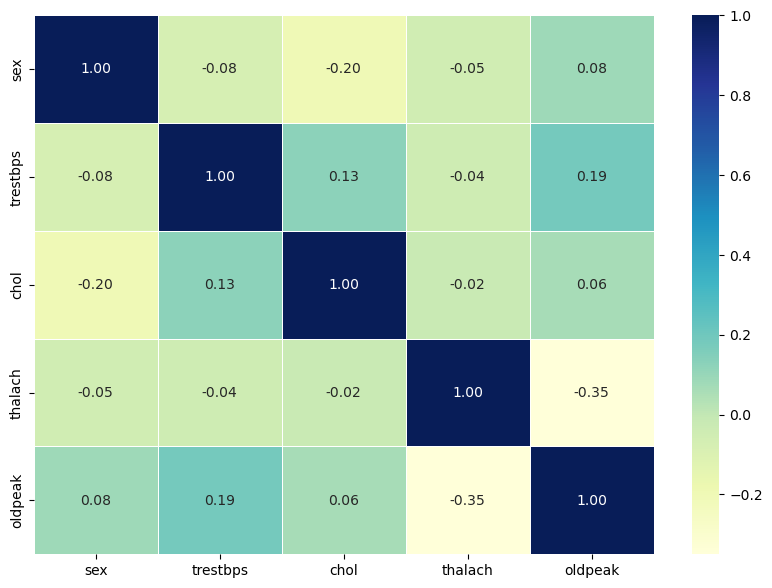

In [14]:
fig,ax = plt.subplots(figsize = [10,7])
ax = sns.heatmap(df.corr(),annot = True, linewidths = 0.5, fmt = '.2f',cmap = 'YlGnBu')


## Modelling and scoring model 
    1. LogisticRegression
    2. KNeighborsClassifier
    3. RandomForestClassifier

In [15]:
x = df.drop('target',axis=1)
y = df.target
np.random.seed(42)
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3)
model_list = {"logistic_Regression" : LogisticRegression(max_iter=1000),
              "k_Neighbors_Classifier": KNeighborsClassifier(),
              "random_Forest_Classifier": RandomForestClassifier()
}
def fit_and_score(model_list,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in model_list.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score
model_score = fit_and_score(model_list,x_train,x_test,y_train,y_test)
model_score

{'logistic_Regression': 0.8051948051948052,
 'k_Neighbors_Classifier': 0.7142857142857143,
 'random_Forest_Classifier': 0.9805194805194806}

In [16]:
cross_val_score(RandomForestClassifier(),x,y,cv = 10,scoring='accuracy')

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97058824, 1.        ])

RandomForestClassifier() bị overfitting ==> loại 

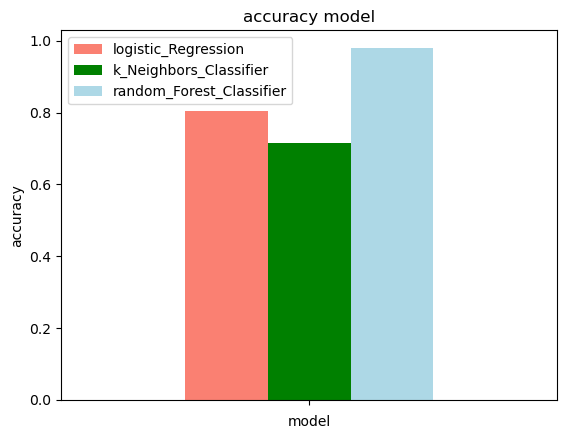

In [17]:
pd.DataFrame(model_score,index=['']).plot(kind='bar',color = ['salmon','green','lightblue'])
plt.xticks(rotation = 0)
plt.title('accuracy model')
plt.xlabel('model')
plt.ylabel('accuracy');

## Hiệu chỉnh hyperparameter 
    1. LogisticRegression
    2. KNeighborsClassifier

In [18]:
model_log_reg = LogisticRegression()
model_kne_cls = KNeighborsClassifier()
grid_log_reg = {'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'lbfgs', 'saga'],
                'max_iter': [1000],
                'multi_class': ['ovr', 'multinomial','auto']}
gs_log_reg = GridSearchCV(estimator=model_log_reg,param_grid=grid_log_reg,cv=5,verbose=2)
gs_log_reg.fit(x_train,y_train)            

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver

D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s


D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=

D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver

D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.1s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s


D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s


D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.1s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END max_iter=1000, multi_class=multi

D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s


D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s


D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END max_iter

D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=saga; total time=   0.0s


D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=auto, penalty=l1, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END max_iter=1000, 

D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=saga; total time=   0.0s
[CV] END max_iter=1000, multi_class=auto, penalty=l2, solver=saga; total time=   0.0s


D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacoda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anacoda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [1000],
                         'multi_class': ['ovr', 'multinomial', 'auto'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             verbose=2)

In [19]:
gs_log_reg.best_params_,gs_log_reg.score(x_test,y_test)

({'max_iter': 1000,
  'multi_class': 'ovr',
  'penalty': 'l1',
  'solver': 'liblinear'},
 0.8181818181818182)

In [20]:
grid_kne_cls = {'n_neighbors': np.arange(5,10,1),
               'leaf_size': np.arange(20,41,10),
              'algorithm': [ 'ball_tree', 'kd_tree', 'brute'],
               'p': [1, 2]}     
gs_kne_cls = GridSearchCV(estimator = model_kne_cls,param_grid=grid_kne_cls,cv=5,verbose=2)
gs_kne_cls.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=1; total time=   0.0s
[CV] END algorithm=ball_t

[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=6, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=6, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=1; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=2; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=40, n_neighbors=7, p=2; total time=   0.0s
[CV]

[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, p=2; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1; total time=   0.0s
[CV] END algorithm=kd_tree, 

[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=1; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=1; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=1; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=1; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=2; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=2; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=2; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=2; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=5, p=2; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=6, p=1; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=6, p=1; total time=   0.0s
[CV] END ..algorithm=brute, leaf_size=30, n_neighbors=6, p=1; total time=   0.0s
[CV] END ..algorithm=brute, 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([20, 30, 40]),
                         'n_neighbors': array([5, 6, 7, 8, 9]), 'p': [1, 2]},
             verbose=2)

In [21]:
gs_kne_cls.best_params_,gs_kne_cls.score(x_test,y_test)


({'algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 5, 'p': 1},
 0.7564935064935064)

In [22]:
model_score_turning = {'logisticRegression_turning': gs_log_reg.score(x_test,y_test),
                      'KNeighborsClassifier_turning': gs_kne_cls.score(x_test,y_test)}

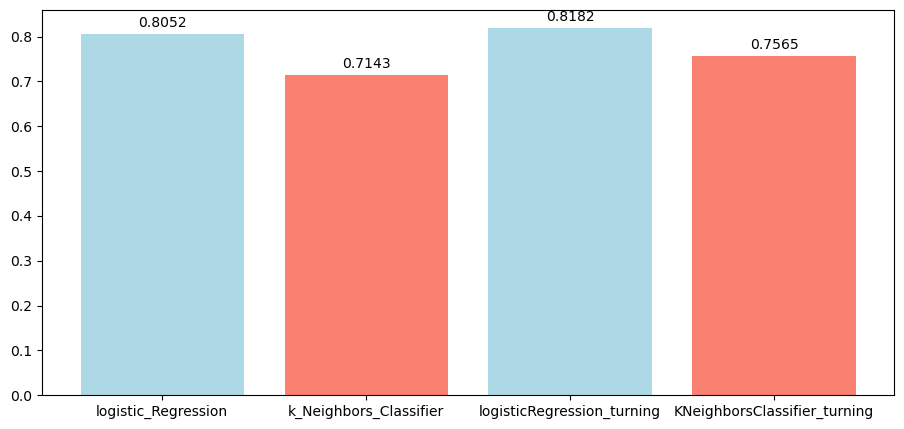

In [23]:
fig,ax = plt.subplots(figsize = [11,5])
a = pd.DataFrame(model_score_turning,index=['score']);
model_score.pop('random_Forest_Classifier',None)
b = pd.DataFrame(model_score,index=['score']);
combine = pd.concat([b,a],axis = 1)
ax.bar(x = combine.columns,height=combine.values[0],color = ['lightblue','salmon','lightblue','salmon'])
for i, v in enumerate(combine.values[0]):
    ax.text(i, v + 0.01, str(round(v,4 )), ha='center', va='bottom')
plt.xticks(rotation = 0);

## Đánh giá mô hình cho LogisticRegression
    1. ROC curve
    2. Confussion matrix
    3. cross-validation with accuracy,precision,recall,F1-score

### 1. ROC curve

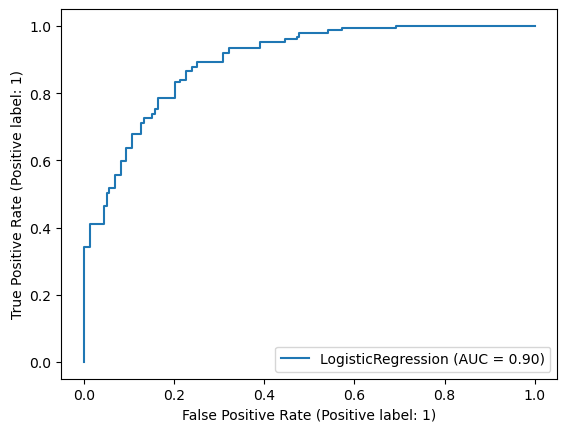

In [24]:
log_reg_best = LogisticRegression(penalty= 'l1',
                solver= 'liblinear',
                max_iter= 1000,
                multi_class= 'ovr')
log_reg_best.fit(x_train,y_train)
RocCurveDisplay.from_estimator(log_reg_best, x_test, y_test);

### 2. Confussion matrix

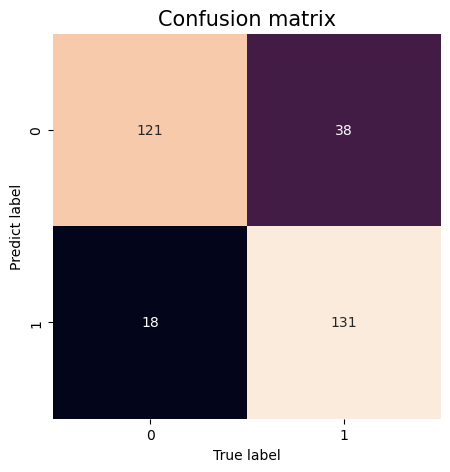

In [25]:
# ham ve confusion matrix
def confusion_matrix_plot (model,x_test,y_test):
    y_pred = log_reg_best.predict(x_test)
    fig,ax = plt.subplots(figsize = [5,5])
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cbar = False,fmt = '.0f');
    plt.xlabel('True label')
    plt.ylabel('Predict label')
    plt.title("Confusion matrix",fontsize = 15)
confusion_matrix_plot(log_reg_best,x_test,y_test)

### 3. cross-validation with accuracy,precision,recall,F1-score

In [26]:
accuracy_mean = np.mean(cross_val_score(log_reg_best,x,y,cv = 5,scoring='accuracy'))

In [27]:
precision_mean = np.mean(cross_val_score(log_reg_best,x,y,cv = 5,scoring='precision'))

In [28]:
recall_mean = np.mean(cross_val_score(log_reg_best,x,y,cv = 5,scoring='recall'))

In [29]:
f1_score_mean = np.mean(cross_val_score(log_reg_best,x,y,cv = 5,scoring='f1'))

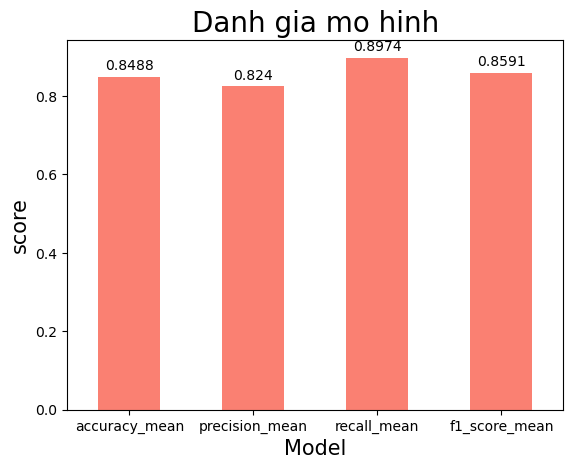

In [30]:
result = {'accuracy_mean':accuracy_mean,
             'precision_mean':precision_mean,
             'recall_mean':recall_mean,
             'f1_score_mean':f1_score_mean}
result_df = pd.DataFrame(result,index=['score'])
ax = result_df.T.plot(kind = 'bar',color = 'salmon',legend = False)
plt.xticks(rotation = 0);
plt.xlabel('Model',fontsize = 15)
plt.ylabel('score',fontsize = 15)
for i, v in enumerate(result_df.values[0]):
    ax.text(i, v + 0.01, str(round(v, 4 )), ha='center', va='bottom')
plt.title('Danh gia mo hinh',fontsize = 20);

## Tìm feature quan trọng

In [31]:
feature_coef = dict(zip(df.columns,log_reg_best.coef_[0]))

Text(0.5, 1.0, 'Ảnh hưởng của từng feature tới kết quả')

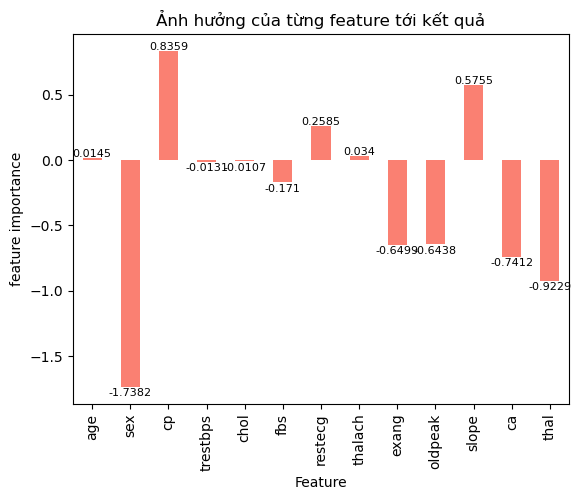

In [32]:
df_coef = pd.DataFrame(feature_coef,index=[''])
ax = df_coef.T.plot(kind = 'bar',color = ['salmon'],legend = False )
plt.xlabel('Feature')
plt.ylabel('feature importance')
for i,v in enumerate(df_coef.values[0]):
     if v >= 0:
        ax.text(i, v + 0.01, str(round(v, 4)), ha='center', va='baseline',fontsize = 8)
     else:
        ax.text(i, v - 0.01, str(round(v, 4)), ha='center', va='top',fontsize = 8)
plt.title('Ảnh hưởng của từng feature tới kết quả')